# Tutorial on Decision Trees and Support Vector Machines (SVM)

In this tutorial, we will explore two powerful machine learning algorithms: Decision Trees and Support Vector Machines (SVM). We'll use Python's `sklearn` library to load datasets, train these models, and evaluate their performance.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_wine()
X = data.data
y = data.target

# Output a brief overview of the dataset
print(data.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training

### Decision Tree

First, we will train a Decision Tree classifier.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth=2)

# Train the classifier
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

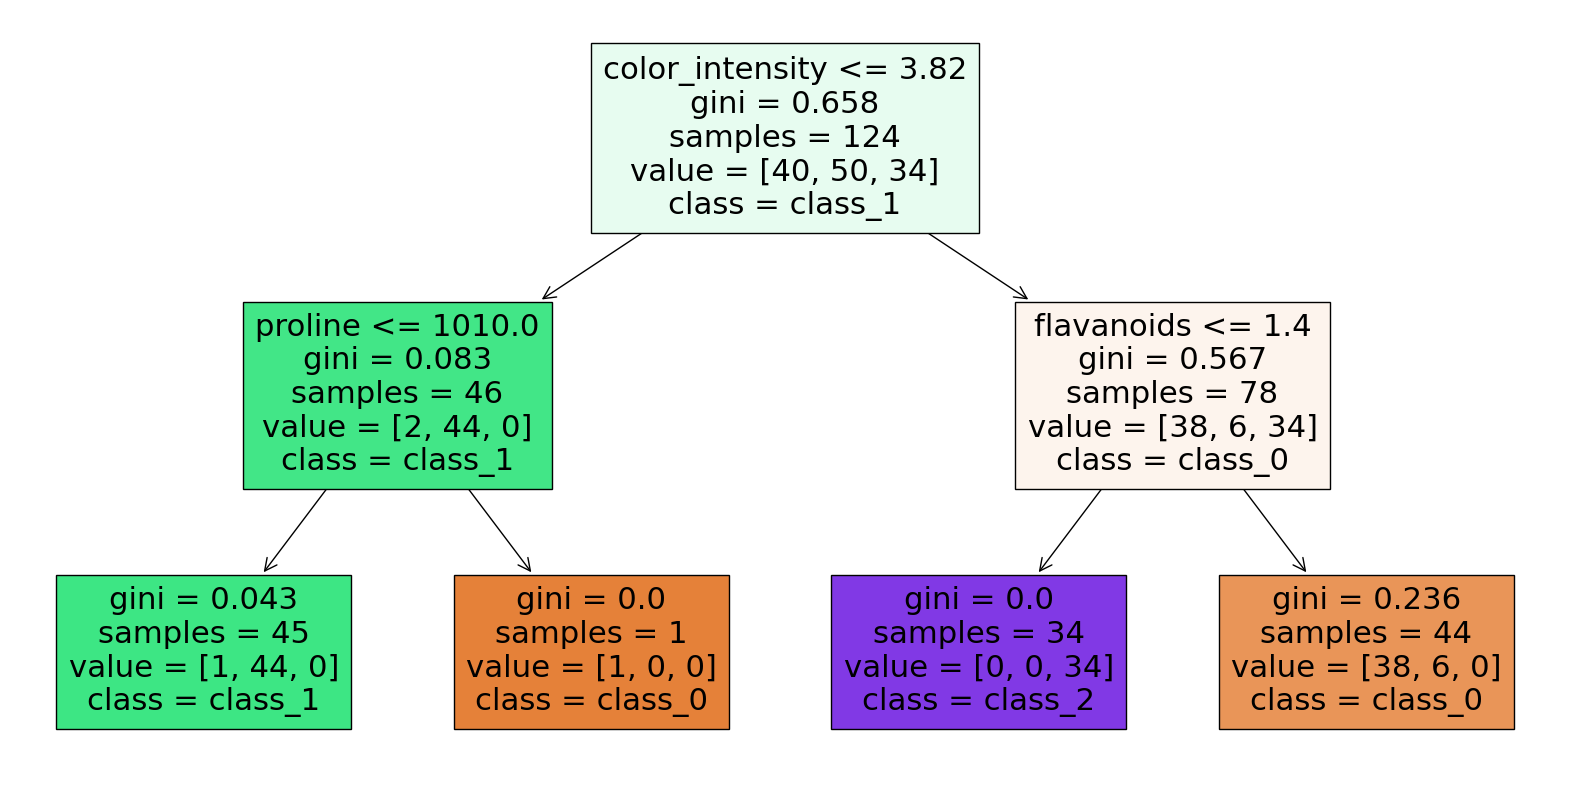

In [ ]:
#Let's try to visualize the decision tree classifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, label='all', filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

### SVM

Next, we will train a Support Vector Machine (SVM).

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM Classifier
svm_classifier = SVC(random_state=42,kernel='linear')

# Train the classifier
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

## Evaluation

Now, let's evaluate the performance of our trained models on the test dataset.


In [ ]:
from sklearn.metrics import accuracy_score

def predict_and_evaluate_model(model,model_name,X_train,X_test,y_train,y_test):
  # Predict and evaluate the Decision Tree
  train_predictions = model.predict(X_train)
  train_accuracy = accuracy_score(y_train, train_predictions)
  print(f"{model_name} Accuracy (Train set): {train_accuracy:2.6f}")

  test_predictions = model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_predictions)
  print(f"{model_name} Accuracy (Test set): {test_accuracy:2.6f}")

predict_and_evaluate_model(dt_classifier,'Decision Tree',X_train,X_test,y_train,y_test)
print('--')
predict_and_evaluate_model(svm_classifier,'SVM',X_train,X_test,y_train,y_test)

Decision Tree Accuracy (Train set): 0.943548
Decision Tree Accuracy (Test set): 0.870370
--
SVM Accuracy (Train set): 0.991935
SVM Accuracy (Test set): 0.981481


More on  *SVM*

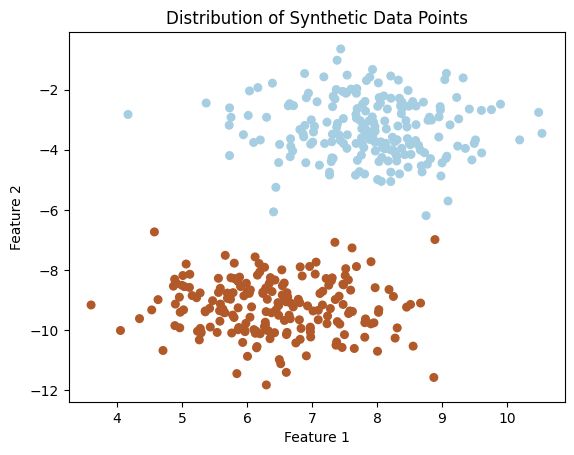

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
# Create 400 separable points
X, y = make_blobs(n_samples=400, centers=2, random_state=6)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Distribution of Synthetic Data Points')
plt.show()


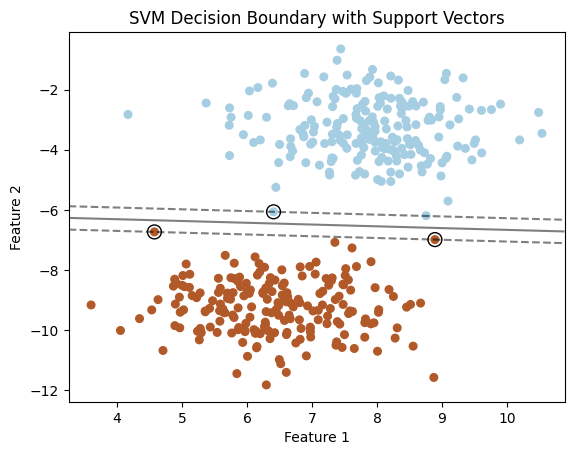

In [ ]:
# Step 2: Fit the model
# Fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Step 3: Plot the trained model's decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Draw the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Support Vectors')
plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### ====================================== Exercise ======================================
# 1. Load the Iris dataset from sklearn. Use the `data`, and `target` variables from the dataset to train classifiers
# 2. Split the data to train and test using 70%-30% split
# 3. Train a decision tree classifier (with default parameters)
# 4. Train an SVM (with default parameters)
# 5. Test the performance of both models

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    print(f"Training Accuracy: {accuracy_score(y_train, train_pred):.2f}")
    print(f"Testing Accuracy: {accuracy_score(y_test, test_pred):.2f}")

# Evaluate Decision Tree
print("Decision Tree Performance:")
evaluate_model(dt, X_train, X_test, y_train, y_test)

# Evaluate SVM
print("SVM Performance:")
evaluate_model(svm, X_train, X_test, y_train, y_test)

Decision Tree Performance:
Training Accuracy: 1.00
Testing Accuracy: 1.00
SVM Performance:
Training Accuracy: 0.97
Testing Accuracy: 1.00
